# Analysis of MNIST Dataset

In [1]:
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def relu(z):
    return np.maximum(0, z)

6. The shpae of the input matrix $\textbf{X}$ is m x 10 where m is the number of instances/rows. The shape of the hidden layer's weight vector $\textbf{W}_h$ is 10 x 50. The shape of the bias vector $b_h$ is 50 x 1. The shape of the output layer's weight vector $\textbf{W}_o$ is 50 x 3. The shape of the bias vector $b_o$ is 3 x 1. The equation of $\textbf{Y}$ is $Y = ReLU( ReLU(XW_h + b_h )W_o + b_o )$.

7. 1 neuron is needed in the outpur layer for classifying email into ham or spam. The sigmoid activation function should be used. For MNIST, 10 output neurons are needed for each class (0-9). The softmax activation function should be used for the output layer, because it will give estimated probabilities (0-1) for each output. For predicting housing prices, one output neuron is needed.

8. Backpropagation is a way to train artifical neural networks by using the chain rule. The steps are as followed:
    <br>$\quad\quad$- Gradients of the cost function with repect to the model parameters are computed
    <br>$\quad\quad$- Reverse-mode autodiff does a forward pass computing the outputs
    <br>$\quad\quad$- Reverse pass computes all gradients
    <br>$\quad\quad$- Gradient Descent is performed using the computed gradients and the learning rate
    <br>$\quad\quad$- This is performed many times until an ideal minimum of the cost funciton is reached

9. All the hyperparamters you can tweak are (1) the number of hidden laters, (2) the number of neurons per hidden layer, (3) learning rate, (4) optmizer, (5) batch size, (6) activation funciton for the hidden and output layer, and (7) number of iterations. If the MPL overfits the training data, it can be beneficial to reduce the number of neurons per hidden layer or reduce the number of hidden layers.

In [2]:
# Load the MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Split the full training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=2442)

# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

In [3]:
tf.random.set_seed(2442)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid), 
                    callbacks = [tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10 ** (epoch / 1.5))])


Epoch 1/10


1500/1500 [==============================] - 19s 11ms/step - loss: 2.3109 - accuracy: 0.1282 - val_loss: 2.3075 - val_accuracy: 0.1282 - lr: 1.0000e-05
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 2.2841 - accuracy: 0.1493 - val_loss: 2.2645 - val_accuracy: 0.1619 - lr: 4.6416e-05
Epoch 3/10
1500/1500 [==============================] - 18s 12ms/step - loss: 2.1695 - accuracy: 0.2698 - val_loss: 2.0806 - val_accuracy: 0.3887 - lr: 2.1544e-04
Epoch 4/10
1500/1500 [==============================] - 17s 11ms/step - loss: 1.6149 - accuracy: 0.6785 - val_loss: 1.1755 - val_accuracy: 0.7838 - lr: 0.0010
Epoch 5/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.6072 - accuracy: 0.8573 - val_loss: 0.4185 - val_accuracy: 0.8862 - lr: 0.0046
Epoch 6/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3158 - accuracy: 0.9104 - val_loss: 0.2554 - val_accuracy: 0.9272 - lr: 0.0215
Epoch 7/10
1500/1500 [==========

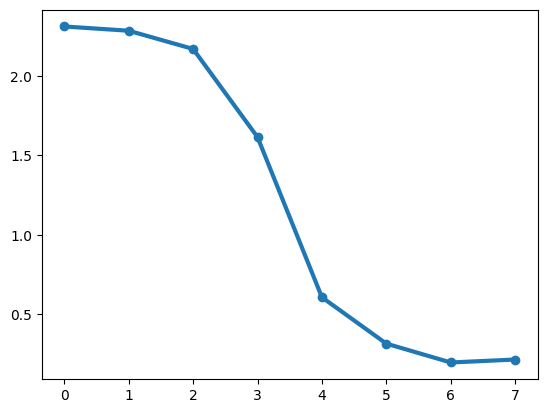

In [5]:
plt.plot(np.arange(0, 10), history.history['loss'], label='loss', lw=3, marker='o')

In [6]:
tf.keras.backend.clear_session()
np.random.seed(2422)
tf.random.set_seed(2422)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

history1 = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid), 
                    callbacks = [tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.02 * 10 ** (epoch / 10))])

Epoch 1/10
1500/1500 [==============================] - 12s 7ms/step - loss: 0.4768 - accuracy: 0.8726 - val_loss: 0.2804 - val_accuracy: 0.9163 - lr: 0.0200
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2355 - accuracy: 0.9322 - val_loss: 0.2125 - val_accuracy: 0.9381 - lr: 0.0252
Epoch 3/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.1745 - accuracy: 0.9492 - val_loss: 0.1620 - val_accuracy: 0.9528 - lr: 0.0317
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1348 - accuracy: 0.9599 - val_loss: 0.1406 - val_accuracy: 0.9578 - lr: 0.0399
Epoch 5/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.1055 - accuracy: 0.9690 - val_loss: 0.1129 - val_accuracy: 0.9675 - lr: 0.0502
Epoch 6/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0849 - accuracy: 0.9749 - val_loss: 0.1074 - val_accuracy: 0.9687 - lr: 0.0632
Epoch 7/10
1500/1500 [===========================

In [7]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0854 - accuracy: 0.9728


[0.08540017902851105, 0.9728000164031982]

In [8]:
tf.keras.backend.clear_session()
np.random.seed(2422)
tf.random.set_seed(2422)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Define your learning rate
learning_rate = 0.1 

# Compile the model with the fixed learning rate
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

# Train the model
history2 = model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_valid, y_valid))

Epoch 1/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2809 - accuracy: 0.9182 - val_loss: 0.1418 - val_accuracy: 0.9572
Epoch 2/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1151 - accuracy: 0.9660 - val_loss: 0.1293 - val_accuracy: 0.9613
Epoch 3/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0768 - accuracy: 0.9762 - val_loss: 0.0990 - val_accuracy: 0.9689
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0543 - accuracy: 0.9834 - val_loss: 0.1236 - val_accuracy: 0.9645
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0414 - accuracy: 0.9875 - val_loss: 0.0825 - val_accuracy: 0.9758
Epoch 6/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0292 - accuracy: 0.9912 - val_loss: 0.0784 - val_accuracy: 0.9763
Epoch 7/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0201 - accuracy: 0.9948 - val_loss: 0.0819 - v

In [9]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0697 - accuracy: 0.9806


[0.06971430778503418, 0.9805999994277954]